In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append("..")
from src.utils import show_example_images

In [2]:
from sklearn.datasets import load_digits
digits_data = load_digits()
x, y = digits_data["images"], digits_data["target"]

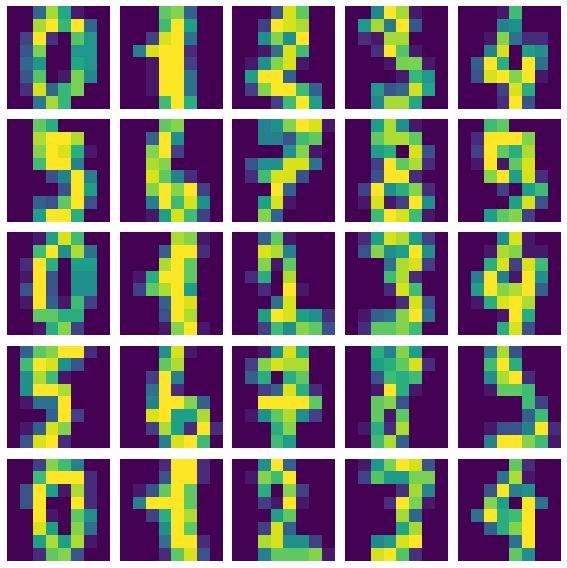

In [3]:
show_example_images(x[:25], n_grid_x=5)

In [4]:
## Step1 -- normalize image and split into train/valid/test

x = x.reshape((len(x), -1))  # convert to vector
x = np.array(x, dtype=np.float32) / 255.  # do min/max normalization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
print("#Train / Valid / Test images: {} / {} / {}".format(len(x_train), len(x_valid), len(x_test)))
print("Input shape: {}".format(x_train.shape))
print("Outputs: {}".format(y))

#Train / Valid / Test images: 1455 / 162 / 180
Input shape: (1455, 64)
Outputs: [0 1 2 ... 8 9 8]


In [5]:
## Step2 -- Build up Basic workflow
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, confusion_matrix

from src.utils import get_result_metrics

In [6]:
from sklearn.linear_model import LogisticRegression

n_classes = y.max() + 1

model = LogisticRegression()
model = model.fit(x_train, y_train)

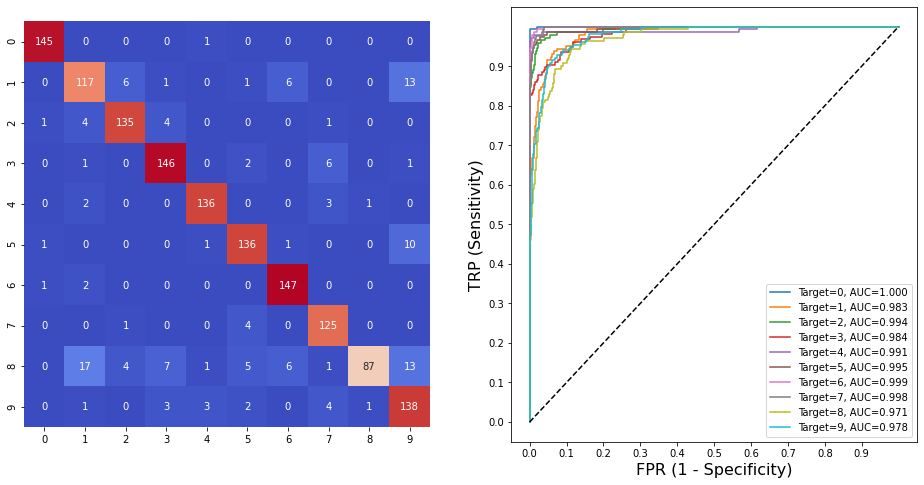

In [7]:
y_pred = model.predict_proba(x_train)
cm = confusion_matrix(y_train, y_pred.argmax(axis=1))

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap="coolwarm")

plt.subplot(122)
results = {}
for i_class in range(n_classes):
    cls_result = get_result_metrics(
        y_true=y_train==i_class,
        y_score=y_pred[:, i_class],
        score_threshold=1./n_classes
    )
    results[i_class] = cls_result
    plt.plot(cls_result["fpr"], cls_result["tpr"], label="Target={}, AUC={:.3f}".format(i_class, cls_result["auc"]))

plt.xlabel("FPR (1 - Specificity)", fontsize=16)
plt.ylabel("TRP (Sensitivity)", fontsize=16)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

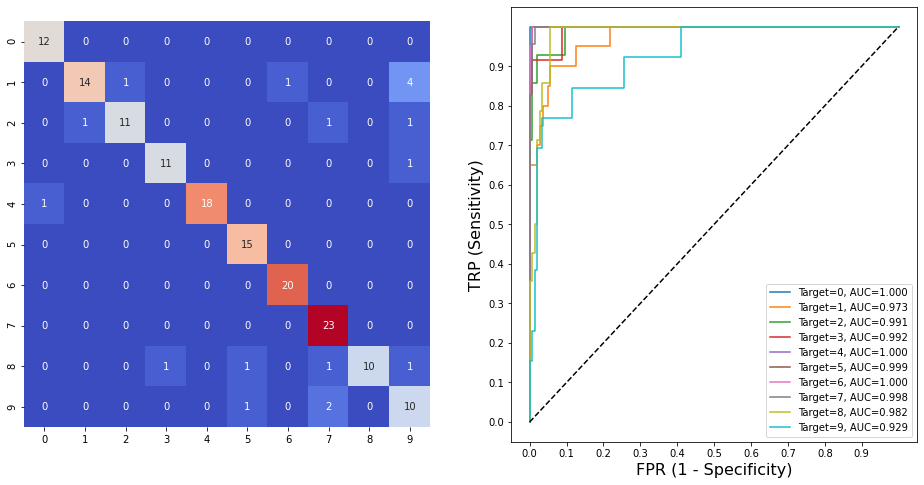

In [8]:
y_pred = model.predict_proba(x_valid)
cm = confusion_matrix(y_valid, y_pred.argmax(axis=1))

plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap="coolwarm")

plt.subplot(122)
results = {}
for i_class in range(n_classes):
    cls_result = get_result_metrics(
        y_true=y_valid==i_class,
        y_score=y_pred[:, i_class],
        score_threshold=1./n_classes
    )
    results[i_class] = cls_result
    plt.plot(cls_result["fpr"], cls_result["tpr"], label="Target={}, AUC={:.3f}".format(i_class, cls_result["auc"]))

plt.xlabel("FPR (1 - Specificity)", fontsize=16)
plt.ylabel("TRP (Sensitivity)", fontsize=16)
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()